<a href="https://colab.research.google.com/github/radhikajain2411/machine-learning/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction using Supervised ML
(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?


In [64]:
#importing the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [65]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [39]:
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [40]:
#how many rows and columns present in dataset ?
data.shape

(25, 2)

In [41]:
#dataset contain any null value or not ?
data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [43]:
#no. of unique value present in dataset ?
data.nunique()

Hours     23
Scores    23
dtype: int64

In [44]:
#Describing the dataset ?
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(2, 2)

Text(83.40000000000006, 0.5, 'Percentage Score')

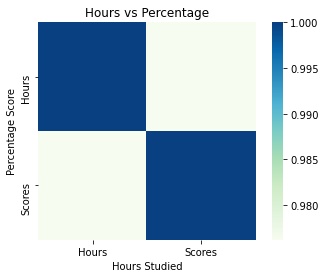

In [11]:
# plot heatmap for correlation b/w the featues
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr,square=True,cmap='GnBu')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

So, there is a postive correlation exists b/w the hours and the score.

In [46]:
#Now , spiliting the target variable and the independent variable
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [20]:
#splitting data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

Linear Regression

In [27]:
#creating a linear regressor
regressor = LinearRegression()

In [29]:
# Train the model using traditional set.
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#Value of intercept
regressor.intercept_

2.018160041434662

In [32]:
#Value of coefficient
regressor.coef_

array([9.91065648])

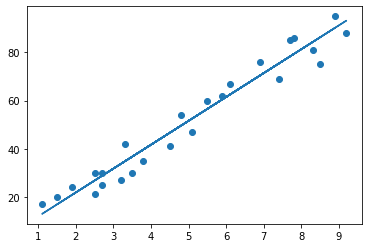

In [34]:
#Plot a regression line in given datpoints
line = regressor.intercept_+regressor.coef_*X

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

MAking Predictions


In [54]:
# Model prediction on test data
y_pred = regressor.predict(X_test)

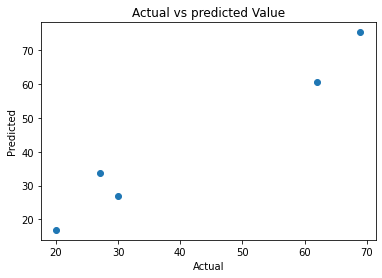

In [57]:
# Visualizing the differences between actual value and predicted value
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs predicted Value")
plt.show()

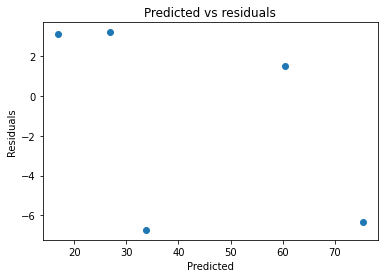

In [60]:
# Checking residuals
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


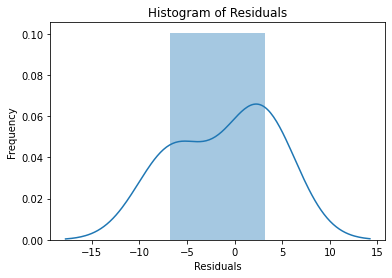

In [61]:
# Checking Normality of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [58]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [72]:
# Model Evaluation using test set
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9454906892105354
Adjusted R^2: 0.9273209189473804
MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373


In [68]:
#Prediction using train data
y_pred = regressor.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9515510725211552
Adjusted R^2: 0.9488594654389972
MAE: 5.186601709180373
MSE: 30.898182377314544
RMSE: 5.558613350226344
